In [1]:
#import a bunch of things

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [27]:
from pathlib import Path
text = Path("Datasets/wikitext.txt").read_text(encoding="utf-8")
print(f"Total characters in wikitext.txt: {len(text):,}")
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("./gpt2_tokenizer")
tokens = tokenizer(text)["input_ids"]
print(f"Total GPT2 tokens: {len(tokens):,}")

Total characters in wikitext.txt: 10,929,707


Token indices sequence length is longer than the specified maximum sequence length for this model (2403644 > 1024). Running this sequence through the model will result in indexing errors


Total GPT2 tokens: 2,403,644


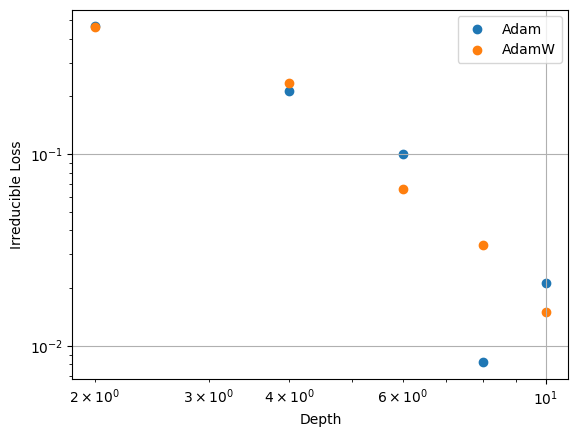

In [20]:
#read in the data
data = pd.read_csv("experiment_results.csv")
irreducible_loss = 1.25
adam_results = data['Final Loss with Adam']
adamw_results = data['Final Loss with AdamW']
depths = data['Depth']
#subtract 1.511 from all the results
adam_results = adam_results-irreducible_loss
adamw_results = adamw_results-irreducible_loss
plt.scatter(depths, adam_results, label='Adam')
plt.scatter(depths, adamw_results, label='AdamW')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Depth')
plt.ylabel('Irreducible Loss')
plt.grid(True)
plt.legend()
plt.show()



#secon plot of loss differences
# loss_differences = adamw_results - adam_results
# plt.scatter(depths, loss_differences)
# plt.xscale('log')
# plt.grid(True)
# plt.show()

#plot the data
# plt.figure(figsize=(10, 6))
# sns.lineplot(x="depth", y="loss", data=data, hue="activation")
# plt.show()


# Figure Out How to Convert to Compute Multiplier

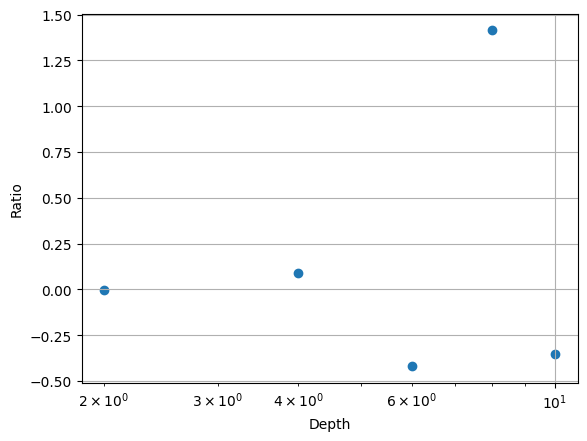

In [24]:
#look at ratio 
ratios =np.log(adamw_results)-np.log(adam_results)
plt.scatter(depths, ratios)
plt.xscale('log')
plt.xlabel('Depth')
plt.ylabel('Ratio')
plt.grid(True)